In [6]:
import numpy as np
import pandas as pd

In [8]:
all_df = pd.read_csv("Clean_eyes.csv")
all_df.head(10)

,Wire ID,Meas_type,Gauge,Board_type,D1,D0,CMD0
0,3560,1,34,0,157.95,165.08,132.17
1,3561,1,34,0,145.38,160.92,144.02
2,3556,1,34,0,147.55,165.25,137.32
3,3558,1,34,0,146.10,130.46,127.01
4,3559,1,34,0,145.95,152.20,142.82
5,3562,1,36,0,182.89,173.60,178.12
6,3563,1,36,0,170.66,167.75,167.15
7,3550,1,36,0,164.83,165.25,140.24
8,3551,1,36,0,152.42,170.34,148.74
9,3552,1,36,0,140.07,187.15,174.68


In [59]:
all_df['Wire ID'].nunique()

10

In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wire ID     40 non-null     int64  
 1   Meas_type   40 non-null     int64  
 2   Gauge       40 non-null     int64  
 3   Board_type  40 non-null     int64  
 4   D1          40 non-null     float64
 5   D0          40 non-null     float64
 6   CMD0        40 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.3 KB


In [10]:
# Seperate by guage
G34_df = all_df[all_df['Gauge']==34].copy()
G36_df = all_df[all_df['Gauge']==36].copy()

## Gauge Comparison

In [49]:
import itertools
import matplotlib.pyplot as plt
import numpy as np


def plot_GaugeRatio(G34_df,G36_df,col,ax, meas, index):
    # Calculate all possible pairs of values
    data = [x/y for x in G34_df[col] for y in G36_df[col]]


    ax[index].boxplot(data, notch=True, patch_artist=True, showmeans=True)
    mean_value = np.mean(data)
    median_value = np.median(data)

    # Add the mean value as a horizontal line
    ax[index].axhline(mean_value, color='blue', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax[index].axhline(median_value, color='red', linestyle='-', label=f'Median: {median_value:.2f}')

    ax[index].set_xlabel('34G')
    ax[index].set_ylabel('36G')
    ax[index].legend()
    ax[index].set_title(col+' '+ meas + " Ratio")




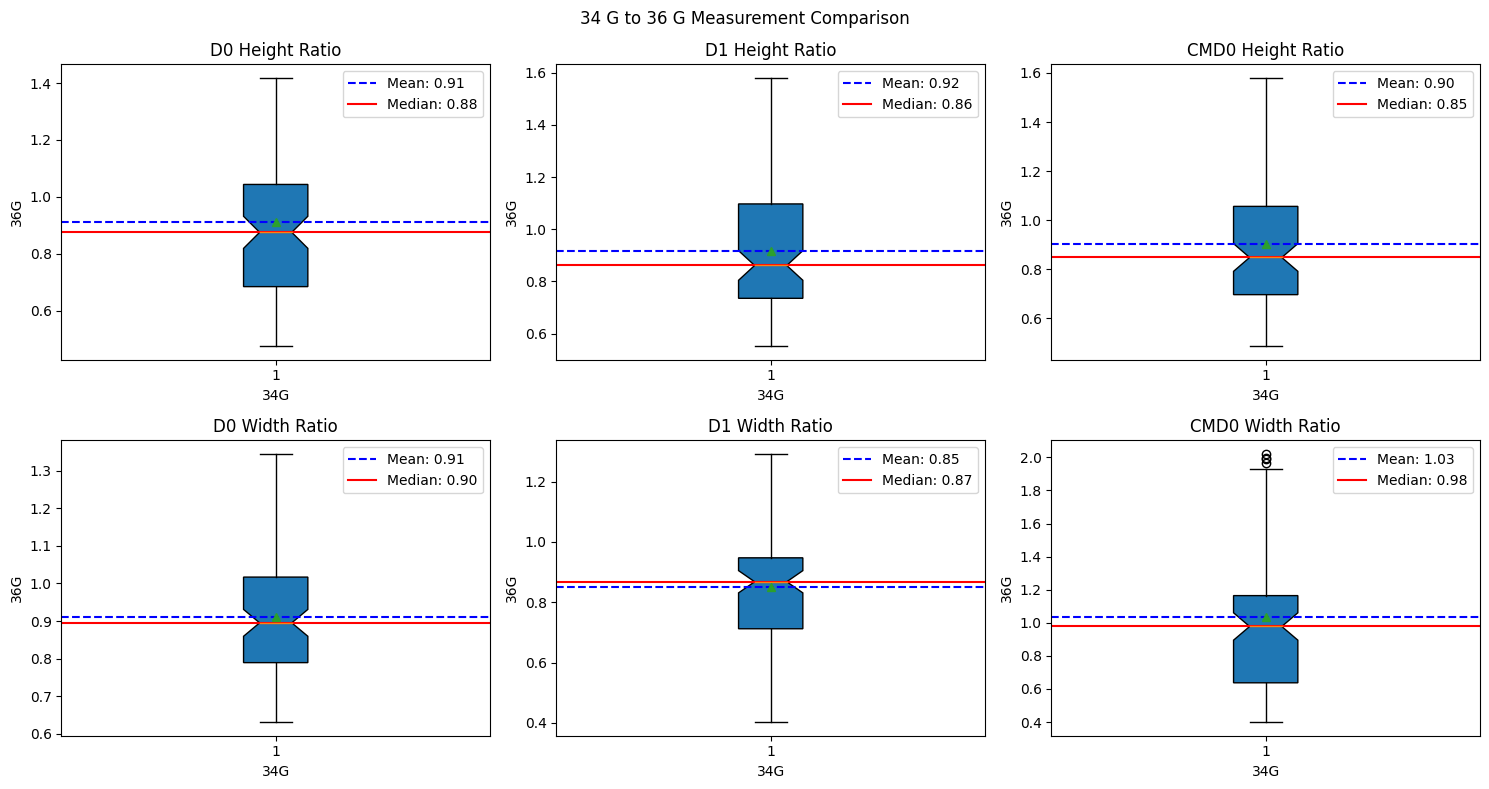

In [57]:
fig, axs = plt.subplots(2,3,figsize =(15,8))
plot_GaugeRatio(G34_df[G34_df['Meas_type']==1],G36_df[G36_df['Meas_type']==1],'D0',axs[0],'Height',0)
plot_GaugeRatio(G34_df[G34_df['Meas_type']==0],G36_df[G36_df['Meas_type']==0],'D0',axs[1],'Width',0)
plot_GaugeRatio(G34_df[G34_df['Meas_type']==1],G36_df[G36_df['Meas_type']==1],'D1',axs[0],'Height',1)
plot_GaugeRatio(G34_df[G34_df['Meas_type']==0],G36_df[G36_df['Meas_type']==0],'D1',axs[1],'Width',1)
plot_GaugeRatio(G34_df[G34_df['Meas_type']==1],G36_df[G36_df['Meas_type']==1],'CMD0',axs[0],'Height',2)
plot_GaugeRatio(G34_df[G34_df['Meas_type']==0],G36_df[G36_df['Meas_type']==0],'CMD0',axs[1],'Width',2)
plt.suptitle("34 G to 36 G Measurement Comparison")

plt.tight_layout()